# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Attar

Student name: Aidin

ID: 2048654

In [1]:
#load the required packages
%matplotlib inline

import           sklearn
import             numpy as  np
import             scipy as  sp
import            pandas as  pd
import matplotlib.pyplot as plt

import   sklearn.metrics as skm

from sklearn.datasets       import  fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition  import           PCA

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2048654
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 49 54 58 66 60 68 64 55 63]


In [6]:
#function for plotting a image and printing the corresponding label
%matplotlib inline
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


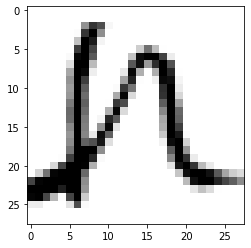

LABEL: 8
INPUT:


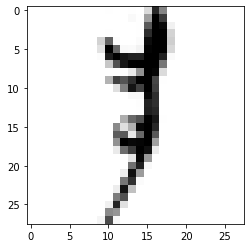

LABEL: 6
INPUT:


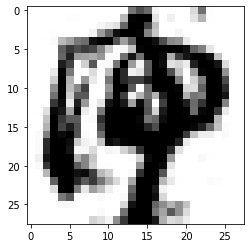

LABEL: 6
INPUT:


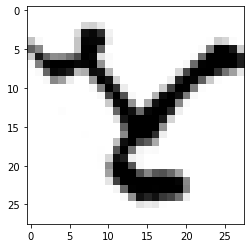

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm             import          SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
svc = SVC(kernel = 'linear')
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print('RESULTS FOR LINEAR KERNEL'  )

print("Best parameters set found:" )
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:"    )
#print(clf.cv_results_)

# using pandas for better view
LinResults = pd.DataFrame.from_dict(clf.cv_results_)
LinResults


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.7349999999999999
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071328,0.017556,0.016906,0.004653,0.01,{'C': 0.01},0.76,0.733333,0.726667,0.720000,0.735000,0.015184,1
1,0.062399,0.003422,0.015694,0.002184,0.1,{'C': 0.1},0.74,0.706667,0.700000,0.726667,0.718333,0.015899,2
2,0.066407,0.000280,0.016902,0.002694,1,{'C': 1},0.74,0.706667,0.700000,0.720000,0.716667,0.015275,3
3,0.076555,0.014678,0.016008,0.002812,10,{'C': 10},0.74,0.706667,0.700000,0.720000,0.716667,0.015275,3


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
svc = SVC(kernel = 'poly', degree=2)
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
QuadResults = pd.DataFrame.from_dict(clf.cv_results_)
QuadResults

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7766666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097206,0.028229,0.019243,0.003072,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,9
1,0.069643,0.003980,0.015635,0.002287,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.806667,0.760000,0.773333,0.766667,0.776667,0.017951,1
2,0.075948,0.005514,0.017039,0.000837,0.01,1,"{'C': 0.01, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
3,0.076701,0.005064,0.016008,0.003380,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.473333,0.533333,0.513333,0.526667,0.511667,0.023274,8
4,0.067264,0.005240,0.014113,0.002600,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.773333,0.733333,0.746667,0.746667,0.750000,0.014530,7
5,0.066285,0.002323,0.011794,0.001975,0.1,1,"{'C': 0.1, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
6,0.060454,0.003626,0.012952,0.001687,1,0.01,"{'C': 1, 'gamma': 0.01}",0.806667,0.760000,0.773333,0.766667,0.776667,0.017951,1
7,0.076760,0.005923,0.013259,0.001198,1,0.1,"{'C': 1, 'gamma': 0.1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
8,0.068915,0.002022,0.012855,0.001668,1,1,"{'C': 1, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3
svc = SVC(kernel = 'poly', degree=degree)
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
CubResults = pd.DataFrame.from_dict(clf.cv_results_)
CubResults

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 1, 'gamma': 0.01}
Score with best parameters:
0.7383333333333333
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099719,0.029159,0.018535,0.003014,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,9
1,0.079589,0.008438,0.014198,0.003502,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.726667,0.686667,0.740000,0.686667,0.710000,0.023805,2
2,0.074854,0.007915,0.014090,0.002945,0.01,1,"{'C': 0.01, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
3,0.149249,0.003696,0.026927,0.001745,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.433333,0.453333,0.493333,0.540000,0.480000,0.040825,8
4,0.106236,0.033309,0.014977,0.005890,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.720000,0.673333,0.726667,0.680000,0.700000,0.023570,3
5,0.077226,0.002850,0.012557,0.001139,0.1,1,"{'C': 0.1, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
6,0.077035,0.002224,0.012641,0.000538,1,0.01,"{'C': 1, 'gamma': 0.01}",0.760000,0.740000,0.726667,0.726667,0.738333,0.013642,1
7,0.076846,0.005484,0.011915,0.001053,1,0.1,"{'C': 1, 'gamma': 0.1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
8,0.080343,0.002818,0.013707,0.001451,1,1,"{'C': 1, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
svc = SVC(kernel = 'rbf')
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

C_best     = clf.best_params_['C']
gamma_best = clf.best_params_['gamma']

# using pandas
rbfResults = pd.DataFrame.from_dict(clf.cv_results_)
rbfResults


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8116666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107423,0.016574,0.046420,0.005489,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
1,0.095883,0.005138,0.042091,0.008686,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.173333,0.160000,0.186667,0.206667,0.181667,0.017240,7
2,0.094629,0.003964,0.035204,0.005311,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
3,0.090225,0.003321,0.035448,0.003977,0.1,1,"{'C': 0.1, 'gamma': 1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
4,0.076634,0.001395,0.037880,0.002950,1,0.001,"{'C': 1, 'gamma': 0.001}",0.613333,0.620000,0.606667,0.613333,0.613333,0.004714,6
5,0.089095,0.003887,0.039305,0.002362,1,0.01,"{'C': 1, 'gamma': 0.01}",0.800000,0.800000,0.773333,0.806667,0.795000,0.012802,3
6,0.094116,0.005991,0.038879,0.006051,1,0.1,"{'C': 1, 'gamma': 0.1}",0.120000,0.133333,0.120000,0.126667,0.125000,0.005528,10
7,0.085534,0.002765,0.034676,0.005241,1,1,"{'C': 1, 'gamma': 1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
8,0.059024,0.006435,0.032117,0.004587,10,0.001,"{'C': 10, 'gamma': 0.001}",0.786667,0.773333,0.733333,0.753333,0.761667,0.020207,4
9,0.082330,0.001903,0.035761,0.005004,10,0.01,"{'C': 10, 'gamma': 0.01}",0.820000,0.806667,0.806667,0.813333,0.811667,0.005528,1


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

As expected, we get the best results for the RBF kernel, with accuracy $\sim 0.81$, followed by the quadratic polynomial, with accuracy $\sim 0.78$. On the other hand the results for the linear and the cubic polynomial kernels are similar, with accuracy $\sim 0.73/74$. The better result for the quadratic polynomial kernel, than the cubic polynomial kernel can be due to an overfitting in the latter. The values of C and gamma are different between the several kernels.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = 'rbf', C = C_best, gamma = gamma_best) # USE YOUR OPTIMAL PARAMETERS

best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error     = 1 - best_SVM.score(X_test,  y_test )

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.170500


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


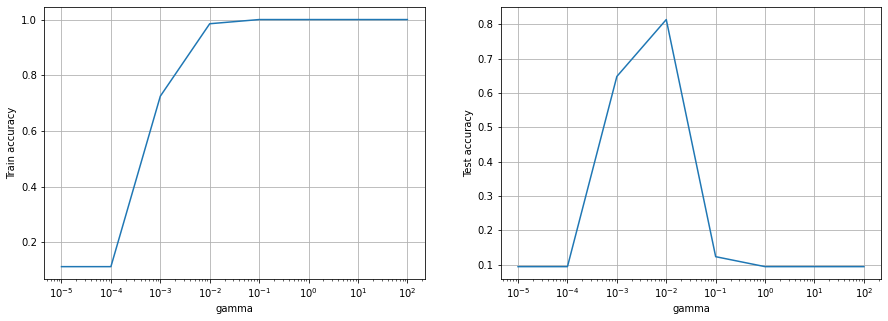

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for x in gamma_values:
    SVM = SVC(kernel='rbf', C=1, gamma=x)
    SVM.fit(X_train, y_train)
    train_acc_list.append(SVM.score(X_train, y_train))
    test_acc_list.append( SVM.score(X_test,  y_test ))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma? Which is the best value of gamma ?
Connect your answers to the discussion about the overfitting issue.

From the plots we can appreciate that the accuracy increases with the value of gamma saturating at gamma=0.1, while the test accuracy has a different behaviour, since in has a peak for gamma = 0.01 and then falls, following a bell-like attitude. Since the accuracy is computed as 1-error, one can say that while the training error declines monotonically with gamma's value, that notwithstanding the test error has a minimum in gamma=0.01.
This behaviour is expected, since the value of gamma controls the concept of "close" and "far" in the kernel function, in other words it controls the boundary regions, : there is a trade-off between precisely fit the training set (with the risk of overfitting) or finding a less accurte but more general solution. For wide gamma we have the best fit over the training set which, overfitting the latter concentrating only around the training data, doesn't allow a good generalization that can fit the test set, raising the risk of overfitting and bad classification of the test set.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 4000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [387 400 421 402 431 393 407 383 389 387]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = 'rbf', C = C_best, gamma = gamma_best) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error     = 1 - best_SVM.score(X_test,  y_test )

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.088161


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, max_iter=4000)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.281429


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C=1, max_iter=4000)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.016500
Best regularized logistic regression test error: 0.241482


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=4000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

As expected, the results are better for the case with m=4000, indeed the test error is double for the case with m=600 than the one with more data points.
The results for the logistic regression, based on the test errors, are better for the regolarized one, while the training error is better of the unregolarized one. This behaviour is due to the regularization that allows more general results. However both the logistic regressions are less accurate than the SVM, even for the one with 600 data points.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.
Clothing???

In [19]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

INPUT:


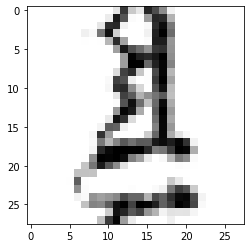

LABEL: 8
Index: 1
LR prediction:  2
SVM prediction:  8
INPUT:


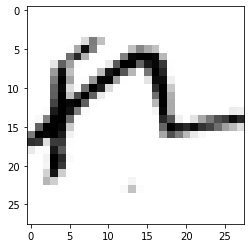

LABEL: 8
Index: 10
LR prediction:  3
SVM prediction:  8
INPUT:


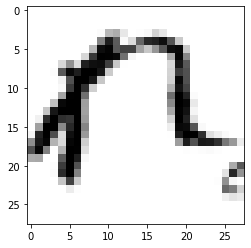

LABEL: 8
Index: 44
LR prediction:  2
SVM prediction:  8
INPUT:


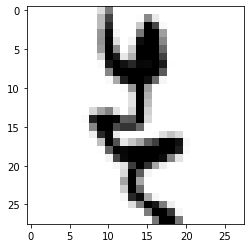

LABEL: 2
Index: 45
LR prediction:  5
SVM prediction:  2
INPUT:


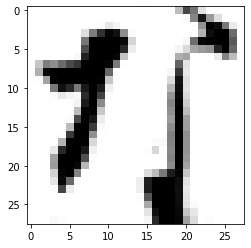

LABEL: 4
Index: 50
LR prediction:  0
SVM prediction:  4
INPUT:


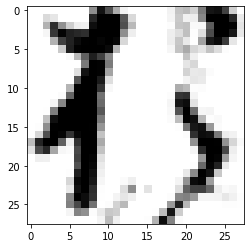

LABEL: 0
Index: 53
LR prediction:  4
SVM prediction:  0


In [20]:
counter = 0
for index, input, predictionSVM, predictionLR, label in zip(range(len(X_test)), X_test, SVM_prediction, LR_prediction, y_test):
    if predictionLR != label and predictionSVM == label:
        #print('input,',input, ', has been classified as', predictionLR, 'by the Logistic Regression and should be', label)
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("LR prediction: ", LR_prediction[index])
        print("SVM prediction: ", SVM_prediction[index])
        counter += 1
    if counter > 5:
        break


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label.
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [21]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM\n\n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)\n\n", confusion_SVM /counts[:,None] )
confusion_SVM_n = confusion_matrix(y_test, SVM_prediction, normalize='true')
print("\n Confusion matrix SVM (normalized directly)\n\n", confusion_SVM_n)

confusion_LR  = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR\n\n", confusion_LR)
print("\n Confusion matrix LR (normalized)\n\n", confusion_LR /counts[:,None] )
confusion_LR_n  = confusion_matrix(y_test, LR_prediction, normalize='true')
print("\n Confusion matrix LR (normalized directly)\n\n", confusion_LR_n )

Labels and frequencies in test set:  [5613 5600 5579 5598 5569 5607 5593 5617 5611 5613]

 Confusion matrix SVM

 [[5298    6    2   14   94   55    8   80   35   21]
 [  15 5068   73   35   96   13  148    6   64   82]
 [   2   89 4873  100   45   21  237   22  124   66]
 [  11   36   98 5252   51   37   30   30   38   15]
 [  96   95   79   23 5073   11   88   16   68   20]
 [  49   84  122  118   61 5064   35   22   34   18]
 [  12   69  229   28  158    9 5005   43   25   15]
 [  30   13   54   33  173   17   59 5176   38   24]
 [  31  108   58   44   27   30  103    5 5192   13]
 [  28  144  144   29  111   11   18   19   47 5062]]

 Confusion matrix SVM (normalized)

 [[0.94 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.  ]
 [0.   0.91 0.01 0.01 0.02 0.   0.03 0.   0.01 0.01]
 [0.   0.02 0.87 0.02 0.01 0.   0.04 0.   0.02 0.01]
 [0.   0.01 0.02 0.94 0.01 0.01 0.01 0.01 0.01 0.  ]
 [0.02 0.02 0.01 0.   0.91 0.   0.02 0.   0.01 0.  ]
 [0.01 0.01 0.02 0.02 0.01 0.9  0.01 0.   0.01 0.  ]

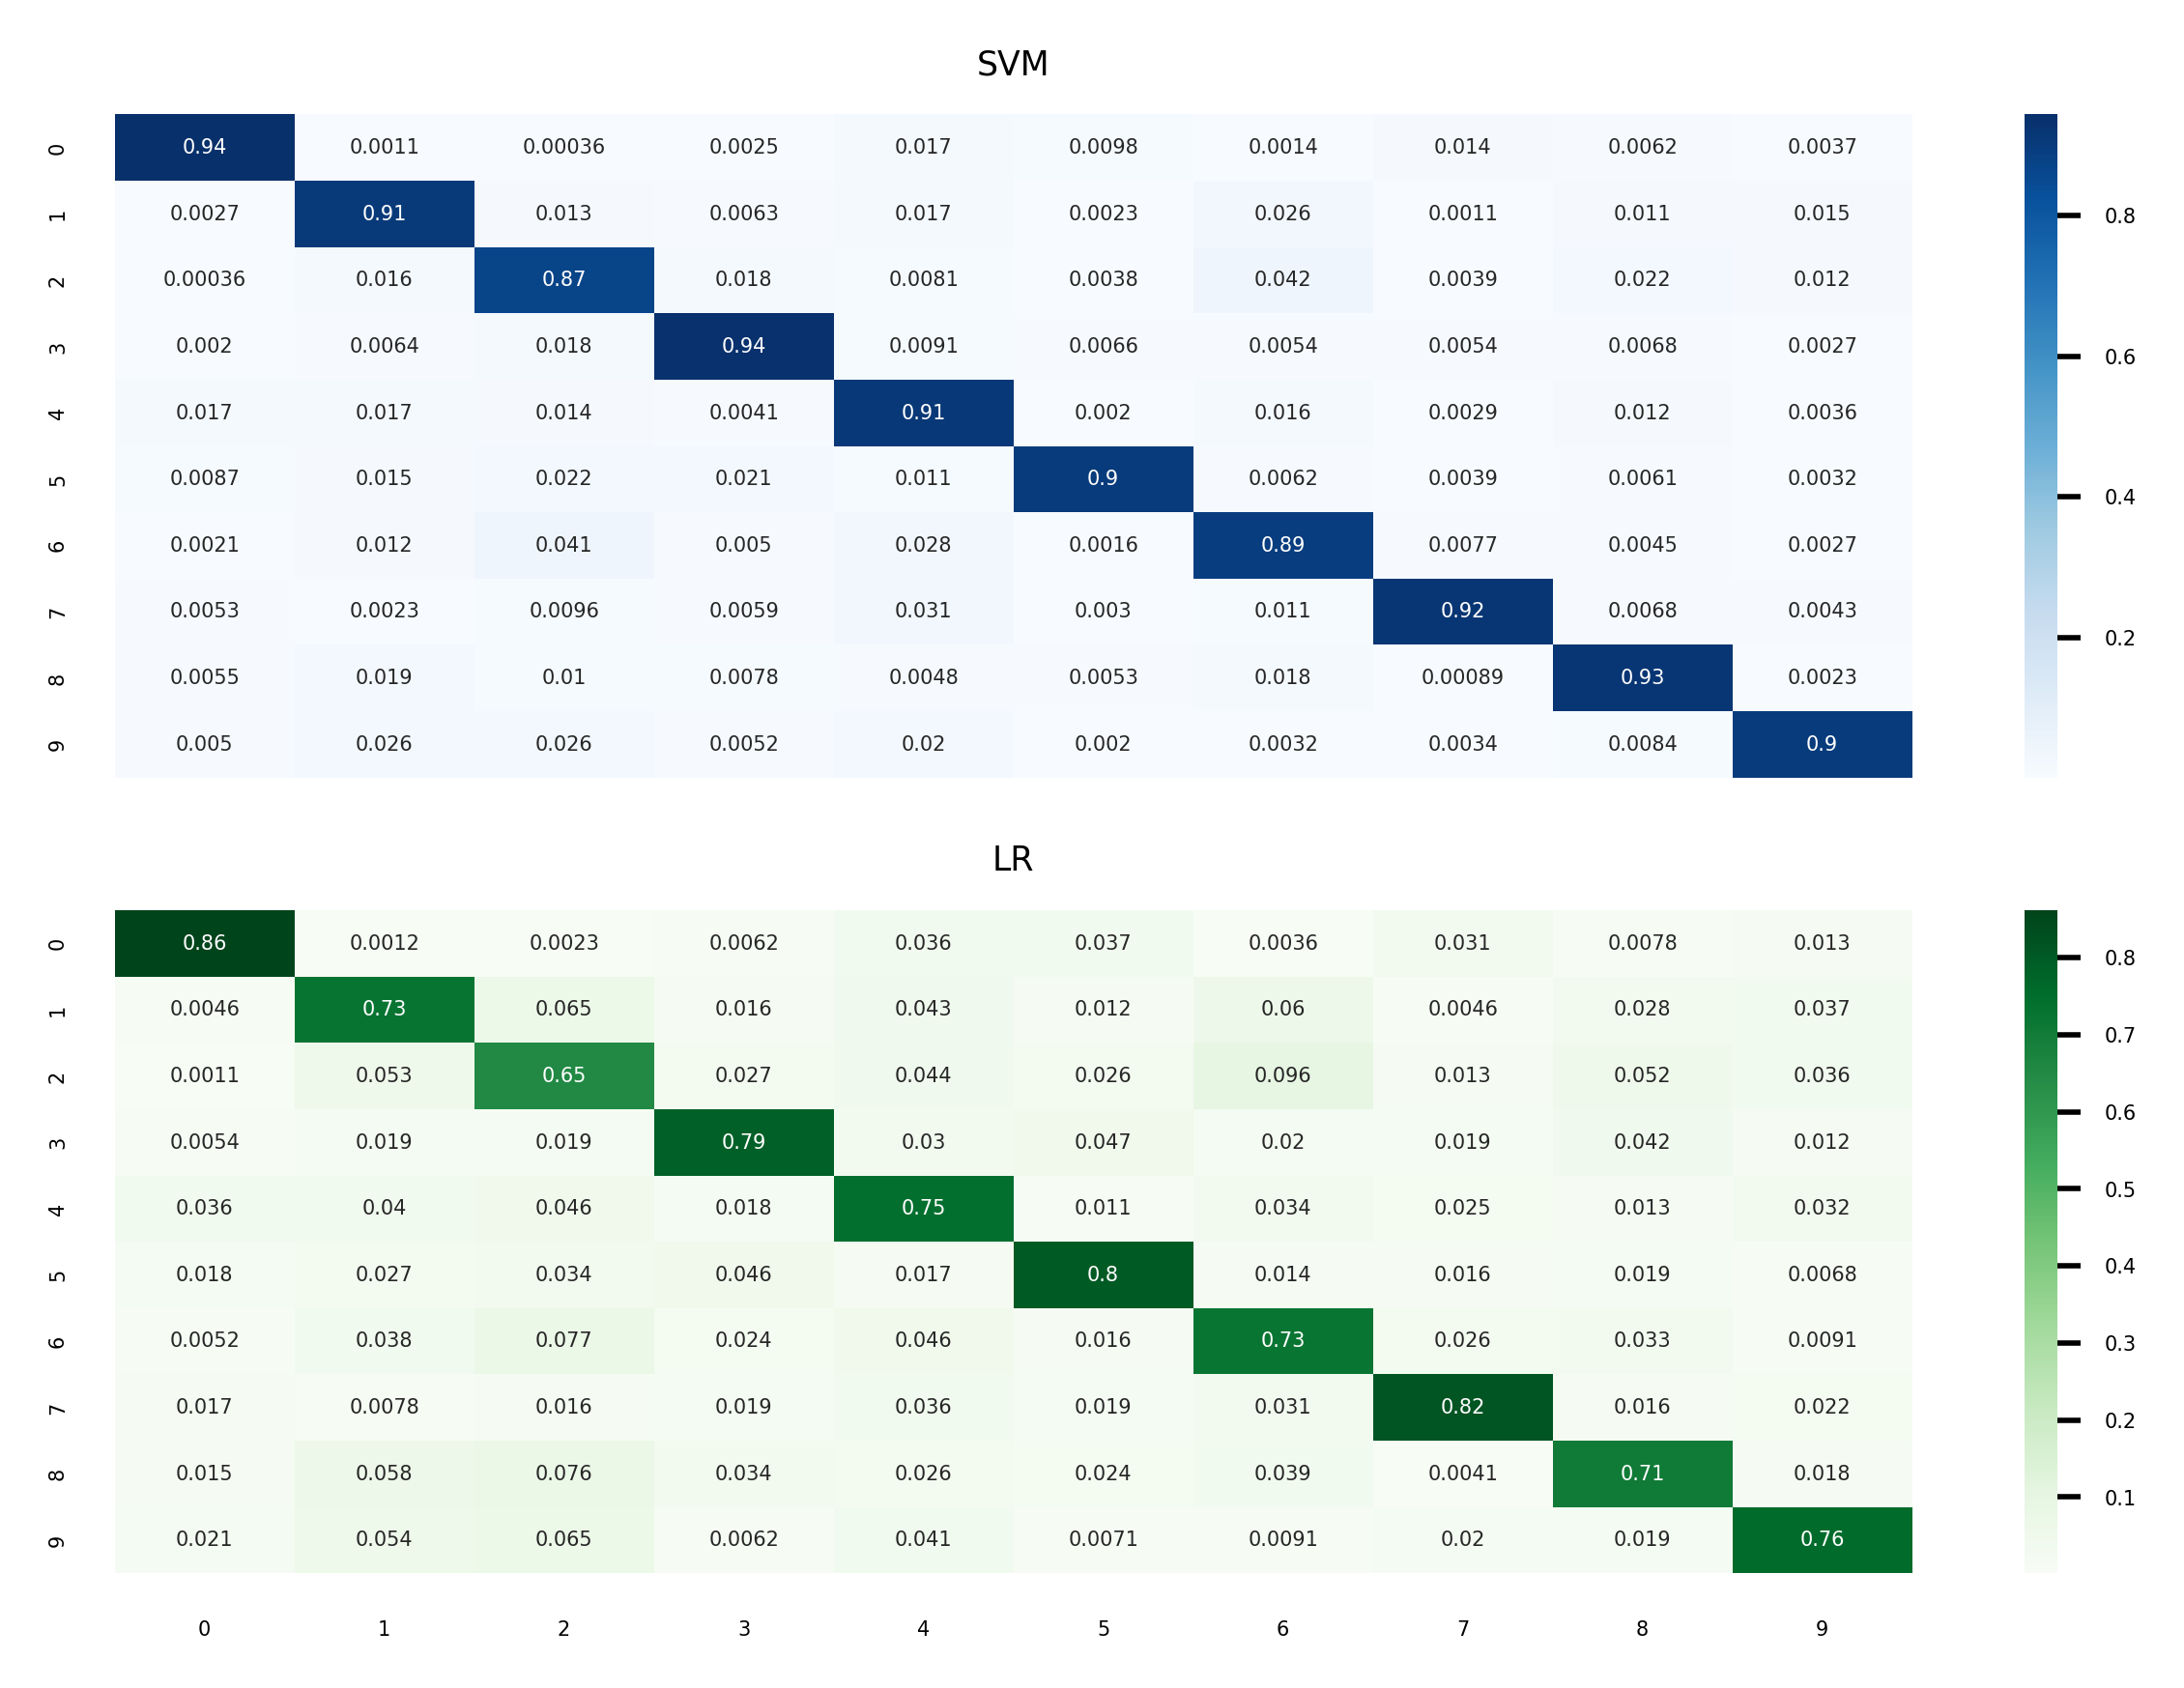

In [22]:
import seaborn as sn

fig, axs = plt.subplots(nrows = 2, ncols = 1, sharey=True, sharex=True, dpi = 500)
plt.rcParams['font.size'] = '3'
axs[0].tick_params(axis='both', labelsize=3)
axs[1].tick_params(axis='both', labelsize=3)
#axs[0].title.set_text('SVM')
#axs[1].title.set_text( 'LR')
axs[0].set_title('SVM', fontsize=5)
axs[1].set_title( 'LR', fontsize=5)
axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[0].tick_params(axis = "y", which = "both", right = False, left = False)
axs[1].tick_params(axis = "y", which = "both", right = False, left = False)

df_cm = pd.DataFrame(confusion_SVM_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Blues", ax = axs[0])

df_cm = pd.DataFrame(confusion_LR_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greens", ax = axs[1])

plt.show()


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

From the prevois figures one can see that for both the SVM and the Logistic Regression, wider probabilities are in diagonal, meaning that most of the results correspond to the correct labels. However for both of them there are some peak of probability of beeing mixed up with another symbol. The worst results are for the 'su' (す) and for the 'ma' (ま), that are mostly confused respectively with 'ma' (ま) (\sim 5\%) and with 'su' (す), therefore between eachother, probabily due to the similarity of the two symbols
